<a href="https://colab.research.google.com/github/GIT-kiran-kumar/Data-analysis/blob/main/EDA_Zomato_cafe_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv(r"/content/reviews.csv")

In [4]:
df.head()

,Index,Name,Overall_Rating,Cuisine,Rate for two,City,Review
0,0,Oliver Brown,3.9,"Cafe, Coffee, Shake, Juices, Beverages, Waffle...",500,ahmedabad,Been to this place 3-4 times. Prakash is alway...
1,1,Oliver Brown,3.9,"Cafe, Coffee, Shake, Juices, Beverages, Waffle...",500,ahmedabad,I recently visited Oliver Brown on a weekend f...
2,2,Crush Coffee,3,"Cafe, Shake, Beverages, Desserts",600,ahmedabad,Very watery ans thin shake
3,3,The Mohalla,3.8,Cafe,550,ahmedabad,it was not cheese burst pizza.. only cheeze wa...
4,4,The Mohalla,3.8,Cafe,550,ahmedabad,"Yammi.,....test burger is best I love 💗 this B..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Index           775 non-null    int64 
 1   Name            775 non-null    object
 2   Overall_Rating  775 non-null    object
 3   Cuisine         775 non-null    object
 4   Rate for two    775 non-null    object
 5   City            775 non-null    object
 6   Review          775 non-null    object
dtypes: int64(1), object(6)
memory usage: 42.5+ KB


In [6]:
df.describe(include="all")

,Index,Name,Overall_Rating,Cuisine,Rate for two,City,Review
count,775.00000,775,775,775,775,775,775
unique,NaN,299,25,292,28,10,771
top,NaN,The Chocolate Room,3.9,"Cafe, Fast Food",500,bangalore,good
freq,NaN,11,92,11,118,166,4
mean,387.00000,NaN,NaN,NaN,NaN,NaN,NaN
std,223.86752,NaN,NaN,NaN,NaN,NaN,NaN
min,0.00000,NaN,NaN,NaN,NaN,NaN,NaN
25%,193.50000,NaN,NaN,NaN,NaN,NaN,NaN
50%,387.00000,NaN,NaN,NaN,NaN,NaN,NaN
75%,580.50000,NaN,NaN,NaN,NaN,NaN,NaN


##Converting Rate for two from object to integer datatype

In [7]:
def remove_comma(x):
    x = x.replace(",","")
    return x

In [8]:
df['Rate for two'] = df["Rate for two"].apply(remove_comma)

In [9]:
df['Rate for two'] = df['Rate for two'].astype(int)

In [10]:
df.City.value_counts()

bangalore     166
jaipur        142
pune          135
ahmedabad     100
chennai        65
chandigarh     57
indore         52
udaipur        31
surat          24
mumbai          3
Name: City, dtype: int64

<Axes: ylabel='City'>

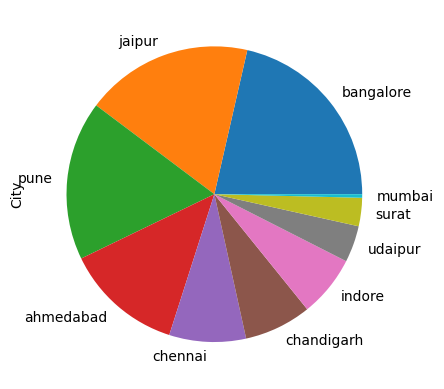

In [11]:
df.City.value_counts().plot(kind="pie")

In [12]:
df.Name.value_counts()

The Chocolate Room               11
Brown Sugar                       6
McCafe by McDonald's              6
Oven The Bakery & Cafe            6
Blue Tokai Coffee Roasters        6
                                 ..
TROT - The Republic Of Taste      1
Richie Rich - On Wheels           1
Shambhus Cafe                     1
Coffee King Cafe & Restaurant     1
SLAY Coffee Bar                   1
Name: Name, Length: 299, dtype: int64

In [13]:
rates = df.groupby("City").agg({"Rate for two":"max"})

<Axes: xlabel='City'>

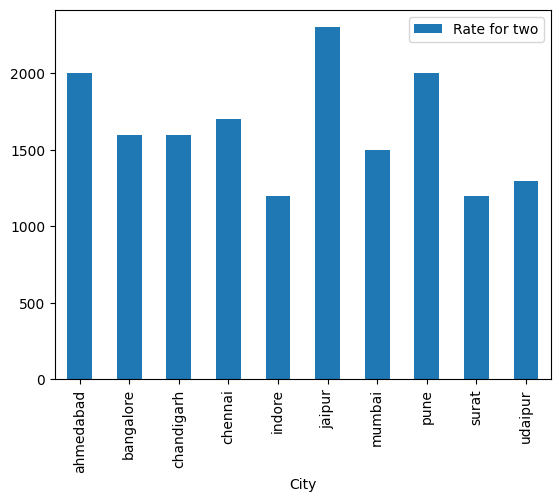

In [14]:
rates.plot(kind="bar")

In [15]:
df.groupby("City").agg({"Rate for two":"mean"})

,Rate for two
City,
ahmedabad,764.500000
bangalore,782.530120
chandigarh,949.122807
chennai,808.461538
indore,784.615385
jaipur,811.267606
mumbai,1500.000000
pune,737.777778
surat,808.333333


##Converting Overall Rating to Float Datatype

In [16]:
def to_float(x):
    if x=="-":
        x = None
    elif x=="New":
        x = None
    else:
        x = float(x)
    return x

In [17]:
df['Overall_Rating'] = df['Overall_Rating'].apply(to_float)

In [18]:
df.groupby("Name").agg({"Overall_Rating":"mean"})

,Overall_Rating
Name,
395 - The Modern Cuisine,3.3
58 Cafe House,NaN
Aakraa House,3.8
Aarambh Cafe,NaN
Aeka Coffee,3.9
...,...
Xero Degrees,4.0
Your Own Brew Cafe,4.5
Yummy Yoga,4.5


In [19]:
types = set()
for row,items in df.iterrows():
    for item in items['Cuisine'].split(","):
        if item not in types:
            types.add(item)

In [20]:
types.remove(" ")

In [21]:
types, len(types)

({' American',
  ' Asian',
  ' BBQ',
  ' Bakery',
  ' Bar Food',
  ' Belgian',
  ' Beverages',
  ' Biryani',
  ' Bubble Tea',
  ' Burger',
  ' Cafe',
  ' Chinese',
  ' Coffee',
  ' Continental',
  ' Desserts',
  ' European',
  ' Fast Food',
  ' Finger Food',
  ' French',
  ' Healthy Food',
  ' Ice Cream',
  ' Italian',
  ' Japanese',
  ' Juices',
  ' Korean',
  ' Lebanese',
  ' Maharashtrian',
  ' Mediterranean',
  ' Mexican',
  ' Middle Eastern',
  ' Momos',
  ' North Indian',
  ' Oriental',
  ' Pancake',
  ' Panini',
  ' Pasta',
  ' Pizza',
  ' Rolls',
  ' Salad',
  ' Sandwich',
  ' Shake',
  ' Sichuan',
  ' South Indian',
  ' Steak',
  ' Street Food',
  ' Sushi',
  ' Tea',
  ' Thai',
  ' Waffle',
  ' Wraps',
  'American',
  'Asian',
  'Bakery',
  'Cafe',
  'Coffee',
  'Desserts',
  'Fast Food',
  'North Indian',
  'Pizza',
  'Sandwich',
  'South Indian',
  'Tea',
  'Waffle'},
 63)